## Starter 2 Code

## Q1: NFL Regression

In [1]:
using DataFrames, DelimitedFiles
using PyPlot, JuMP, HiGHS, Ipopt

In [2]:
teams = [ "49ers", "falcons", "ravens", "steelers", "bears", "vikings", "lions", "saints", "bucs", "patriots", "jets", "packers", "chargers", "raiders", "cardinals", "giants", "panthers", "redskins", "jaguars", "browns", "colts", "chiefs", "eagles", "cowboys", "seahawks", "dolphins","titans", "bills", "broncos", "rams", "bengals" ]
teamIDs = Dict( zip( teams, Array(1:31) ) )
data = readdlm( joinpath(@__DIR__, "nfl.inc" ), header=false)
results_table=Array{Int16,2}(undef, size(data,1),4)
for i in 1:size( data, 1 )
    base = data[ i, 1 ]
    res = data[ i, 2 ]
    splits = split( base, "." )
    week = parse( Int64, splits[1] )
    away = splits[2]
    home = splits[3]
    aid = teamIDs[away]
    hid = teamIDs[home]
    results_table[i,1]=week
    results_table[i,2]=aid
    results_table[i,3]=hid
    results_table[i,4]=res
end
# print(results_table)


n_terms=size(results_table,1)
n_teams=31

31

## Q1(a)

In [3]:
# Solution for (a)
m = Model(Ipopt.Optimizer)

@variable(m, home_field)
@variable(m, ratings[1:n_teams])

@constraint(m, sum(ratings) == 0)

@objective(m, Min, sum((ratings[results_table[i, 3]] - ratings[results_table[i, 2]] + home_field - results_table[i, 4])^2 for i in 1:n_terms))

optimize!(m)

# Print results
for i = 1:n_teams
    println(teams[i], " : ", value(ratings[i]))
end
println("Home field advantage: ", value(home_field))



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       31
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      183

Total number of variables............................:       32
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality co

## Q1(b)

In [4]:
# Solution for (b)

m = Model(Ipopt.Optimizer)

@variable(m, home_field)
@variable(m, ratings[1:n_teams])
@variable(m, t[1:n_terms])
for i in 1:n_terms
    @constraint(m, -t[i] <= ((ratings[results_table[i, 3]] - ratings[results_table[i, 2]] + home_field) - results_table[i, 4]))
    @constraint(m, ((ratings[results_table[i, 3]] - ratings[results_table[i, 2]] + home_field) - results_table[i, 4]) <= t[i])
end
@constraint(m, sum(ratings) == 0)
@objective(m, Min, sum(t[i] for i in 1:n_terms))

optimize!(m)

for i = 1:n_teams
    println(teams[i], " : ", value(ratings[i]))
end
println("Home field advantage: ", value(home_field))

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       31
Number of nonzeros in inequality constraint Jacobian.:     1144
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      175
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:      286
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      286

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.10e+01 3.33e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

## Q1(c)

In [5]:
# Solution for (c)

m = Model(Ipopt.Optimizer)

@variable(m, ratings[1:n_teams])
@variable(m, home_fields[1:n_teams])

@constraint(m, sum(ratings) == 0)

@objective(m, Min, sum((ratings[results_table[i, 3]] + home_fields[results_table[i, 3]] - ratings[results_table[i, 2]] - results_table[i, 4])^2 for i in 1:n_terms))

optimize!(m)

# print results
for i=1:n_teams
    println(teams[i]," : ",value(ratings[i]), ", Home field advantage: ", value(home_fields[i]))
end

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       31
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      356

Total number of variables............................:       62
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.9333000e+04 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

## Q1(d)

In [6]:
# Solution for (d)

seahawks_1 = -1.3183228941788285
dolphins_1 = 4.386500309230531
home_field_1 = 1.9144730265342742


dolphins_2 = 5.871320792577739
seahawks_2 = -0.12677920124313583
home_field_2 = 1.1428571420219658

predicted_margin_1 = seahawks_1 - dolphins_1 + home_field_1
predicted_margin_2 = seahawks_2 - dolphins_2 + home_field_2

println("Seahawks are expected to win against Dolphins by ", abs(predicted_margin_1), " points.")
println("Dolphins are expected to win against Seahawks by ", abs(predicted_margin_2), " points.")

Seahawks are expected to win against Dolphins by 3.7903501768750854 points.
Dolphins are expected to win against Seahawks by 4.855242851798909 points.


**solution (d)** 
If the Dolphins were to visit the Seahawks, the expected winner according to the sum-of-squares model would be Seahawks with margin 3.7903501768750854. 
Using the l_1 model, the expected winner would be dolphins with margin 4.855242851798909.

## Q2: Huber Loss

In [7]:
# Q2 Starter Code

using PyPlot, JuMP, Ipopt


y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02];
x = 1:15;



## Q2(a)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.2623168e+03 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

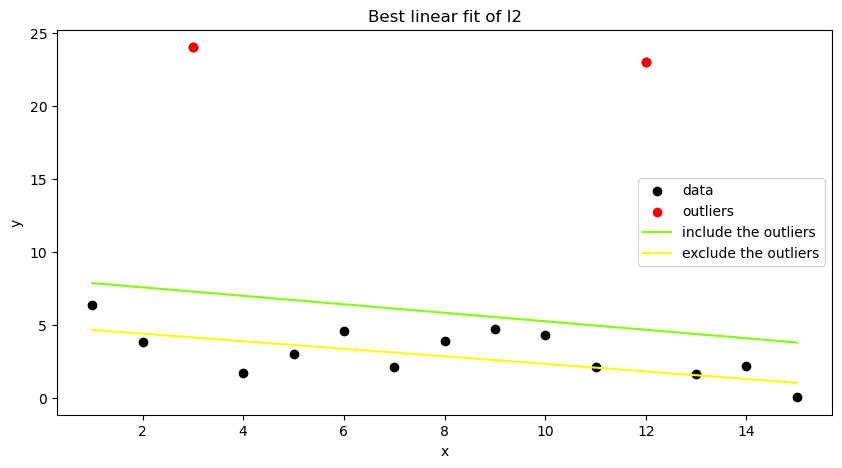

PyObject <matplotlib.legend.Legend object at 0x0000015A973D2110>

In [8]:
m = Model(Ipopt.Optimizer)

@variable(m, a1)
@variable(m, b1)

@objective(m, Min, sum((y[i] - a1*x[i] - b1)^2 for i = 1:15))

optimize!(m)

a1 = value(a1)
b1 = value(b1)

print("Best linear fit of l2 including the outliers:\n")
print("a1 = ", a1, "\n")
print("b1 = ", b1, "\n")

new_x = 1:15
new_y = [6.31, 3.78, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 1.58, 2.17, 0.02]

m = Model(Ipopt.Optimizer)

@variable(m, a2)
@variable(m, b2)

@objective(m, Min, sum((new_y[i] - a2*new_x[i] - b2)^2 for i = 1:13)) # BoundsError(15)

optimize!(m)

a2 = value(a2)
b2 = value(b2)

print("Best linear fit of l2 excluding the outliers:\n")
print("a2 = ", a2, "\n")
print("b2 = ", b2, "\n")

figure(figsize=(10, 5))
scatter(x, y, label="data", color="black")
scatter([x[3], x[12]], [y[3], y[12]], label="outliers", color="red") # outliers
plot(x, a1*x.+ b1, color="chartreuse", label="include the outliers")
plot(x, a2*x.+ b2, color="yellow", label="exclude the outliers")
title("Best linear fit of l2")
ylabel("y")
xlabel("x")
legend(loc="best")

## Q2(b)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       90
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       17
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       30
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       30

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.40e+01 3.33e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

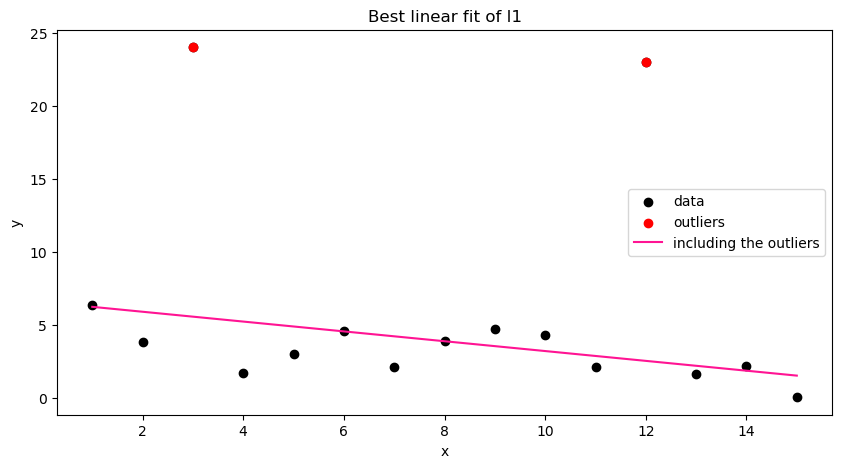

PyObject <matplotlib.legend.Legend object at 0x0000015AACC8AF20>

In [9]:
m = Model(Ipopt.Optimizer)

@variable(m, a)
@variable(m, b)
@variable(m, t[1:15])

for i in 1:15
    @constraint(m, -t[i] <= y[i]-a*x[i]-b)
    @constraint(m, y[i]-a*x[i]-b <= t[i])
end

@objective(m, Min, sum(t))

optimize!(m)

a = value(a)
b = value(b)

print("Best linear fit of l1 including the outliers:\n")
print("a = ", a, "\n")
print("b = ", b, "\n")

figure(figsize=(10, 5))
scatter(x, y, label="data", color="black")
scatter([x[3], x[12]], [y[3], y[12]], label="outliers", color="red") # outliers
plot(x, a*x.+ b, color="deeppink", label="including the outliers")
title("Best linear fit of l1")
ylabel("y")
xlabel("x")
legend(loc="best")

## Q2(c)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      180
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:       47
                     variables with only lower bounds:       15
                variables with lower and upper bounds:        0
                     variables with only upper bounds:       15
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       60
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       60

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.9999970e-01 2.40e+01 6.47e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

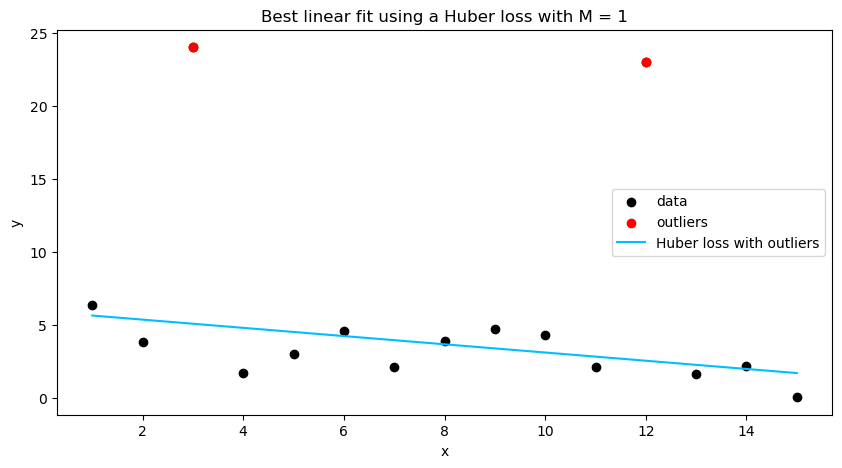

PyObject <matplotlib.legend.Legend object at 0x0000015AA8A7BA30>

In [10]:
m = Model(Ipopt.Optimizer)

@variable(m, 0 <= v[1:15])
@variable(m, w[1:15] <= 1)
@variable(m, a3)
@variable(m, b3)
@variable(m, t[1:15])

for i in 1:15
    @constraint(m, t[i] <= w[i])
    @constraint(m, t[i] <= v[i])
    @constraint(m, -t[i]-v[i] <= y[i] - a3*x[i] - b3)
    @constraint(m, y[i] - a3*x[i] - b3 <= t[i]+v[i])
    @objective(m, Min, sum(w[i]^2 for i=1:15) + 2*1*sum(v[i] for i=1:15))
end

optimize!(m)

a3 = value(a3)
b3 = value(b3)

print("Best Huber Loss linear fit:\n")
print("a = ", a3, "\n")
print("b = ", b3, "\n")

figure(figsize=(10, 5))
scatter(x, y, label="data", color="black")
scatter([x[3], x[12]], [y[3], y[12]], label="outliers", color="red") # outliers
plot(x, a3.*x.+ b3, color="deepskyblue", label="Huber loss with outliers")
title("Best linear fit using a Huber loss with M = 1")
ylabel("y")
xlabel("x")
legend(loc="best")

## Q2(d)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.2623168e+03 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

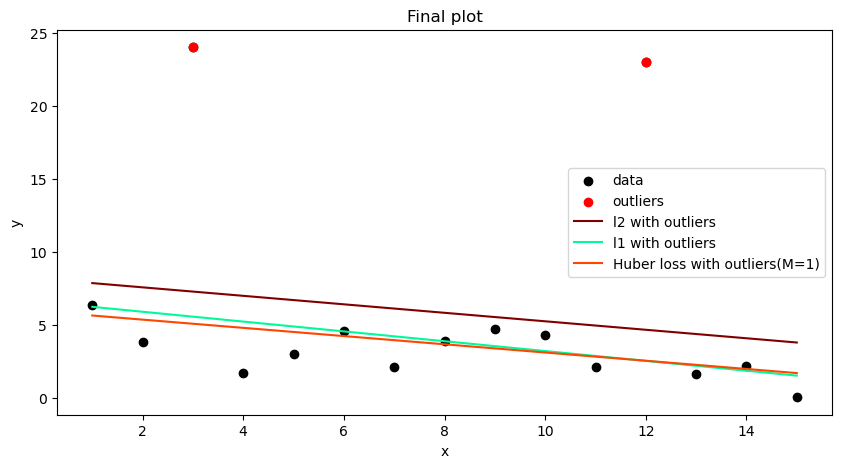

PyObject <matplotlib.legend.Legend object at 0x0000015AA8B0B940>

In [11]:
# (a)
m = Model(Ipopt.Optimizer)

@variable(m, a1)
@variable(m, b1)

@objective(m, Min, sum((y[i] - a1*x[i] - b1)^2 for i=1:15))

optimize!(m)
    
a1 = value(a1)
b1 = value(b1)

# (b)
m = Model(Ipopt.Optimizer)

@variable(m, a2)
@variable(m, b2)
@variable(m, t[1:15])

for i in 1:15
    @constraint(m, -t[i] <= y[i]-a2*x[i]-b2)
    @constraint(m, y[i]-a2*x[i]-b2 <= t[i])
end

@objective(m, Min, sum(t))

optimize!(m)
    
a2 = value(a2)
b2 = value(b2)

# (c)
m = Model(Ipopt.Optimizer)

@variable(m, w[1:15] <= 1)
@variable(m, 0 <= v[1:15])
@variable(m, a3)
@variable(m, b3)
@variable(m, t[1:15])

for i in 1:15
    @constraint(m, t[i] <= w[i])
    @constraint(m, t[i] <= v[i])
    @constraint(m, -t[i]-v[i] <= y[i]-a3*x[i]-b3)
    @constraint(m, y[i]-a3*x[i]-b3 <= t[i]+v[i])
    @objective(m, Min, sum(w[i]^2 for i=1:15) + 2*1*sum(v[i] for i=1:15))
end
optimize!(m)

a3 = value(a3)
b3 = value(b3)

figure(figsize=(10, 5))
scatter(x, y, label="data", color="black")
scatter([x[3], x[12]], [y[3], y[12]], label="outliers", color="red") # outliers
plot(x, a1.*x.+ b1, color="maroon", label="l2 with outliers")
plot(x, a2.*x.+ b2, color="mediumspringgreen", label="l1 with outliers")
plot(x, a3.*x.+ b3, color="orangered", label="Huber loss with outliers(M=1)")
ylabel("y")
xlabel("x")
title("Final plot")
legend(loc="best")

## 3. Heat pipe design

## Q3(a)

maximize a4*T*r^2

subject to: a1*T*(w^−1) + a2r + a3rw <= Cmax
        
        Tmin <= T <= Tmax
        
        rmin <= r <= rmax
        
        wmin <= w <= wmax
        
        0.1r >= w

minimize (1/a4)(T^−1)(r^−2)

subject to: (a1/Cmax)T(w^−1)r+(a2/Cmax)r+(a3/Cmax)rw <= 1

        (1/Tmax)T <= 1, Tmin(T^−1) <= 1

        (1/rmax)r <= 1, rmin(r^−1) <= 1

        (1/wmax)w <= 1, wmin(w^−1) <= 1

        10w(r^−1) <= 1

**Change to Gemoetric Program:**

Let x = log(T), y = log(r), z = log(w)

minimize log(e^(log(a4^-1)-x-2y))

subject to: log(e^(log(a1/Cmax)+x+y+z)+e^(log(a2/Cmax)+y)+e^(log(a3/Cmax)+y+z)) <= 0

        log(e^(log(1/Tmax)+x)) <= 0, log(e^(log(Tmin)-x)) <= 0

        log(e^(log(1/rmax)+y)) <= 0, log(e^(log(rmin)-y)) <= 0

        log(e^(log(1/wmax)+z)) <= 0, log(e^(log(wmin)-z)) <= 0

        log(e^(log(10)-y+z)) <= 0

## Q3(b)

In [12]:
using JuMP

m = Model(Ipopt.Optimizer)

@variable(m, x)
@variable(m, y)
@variable(m, z)

@NLconstraint(m, 0 >= log(exp(log(1/500)+x+y-z) + exp(log(1/500)+y) + exp(log(1/500)+y+z)))
@NLconstraint(m, 0 >= log(exp(log(10)-y+z)))

@NLobjective(m, Min, log(exp(log(1)-x-2y)))
optimize!(m)

a = exp(value(x))
b = exp(value(y))
c = exp(value(z))
print("T = ", a, "\n", "r = ", b, "\n", "w = ", c, "\n")
print("Optimal objective value = ", a*b*c)


This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.30e+00 7.71e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  